[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/cohmathonc/BIOSCI544/blob/master/BIOSCI544_GrowthLaws%2BDynamicalSystems.ipynb)

In [0]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

font = {'font.weight' : 'normal',
        'font.size'   : 18}
plt.rcParams.update(font)

def solve_euler(f, t, y_0):
    y = np.zeros(t.shape)
    y[0] = y_0
    for i in range(0, len(t)-1):
        y[i+1] = y[i] + (t[i+1]-t[i]) * f(t[i],y[i])
    return y

In [75]:
print("%.3E"%(np.exp(30)))

1.069E+13


# Exponential Growth

The Exponential model is an empirical growth model, based on the assumption that the per capita growth rate is constant. This means that the change in population $N$ per individual over a time period $\Delta t$ is a constant, $r$ so that

\begin{equation}
\frac{\Delta N}{N}=r \Delta t
\end{equation}

We can rearrange this equation and use differential calculus notation to write the Exponential model as a differential equation

\begin{equation}
      \frac{dN}{dt} = rN(t) \tag{1}
\end{equation}
where the population grows or shrinks over time $N(t)$ growth rate $r$. The solution to this equation is given by

This equation has the solution

\begin{equation}
      N(t) = N_0 e^{rt}
\end{equation}
where $N_0$ is the population size at time zero, or the initial population size.


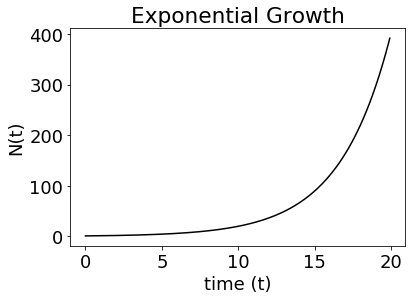

In [76]:
# plotting
r=0.3
N0=1
t = np.arange(0, 20, 0.1)
def expmodel(t,r,N0):
    return N0*np.exp(r * t)
#expmodel = N0*np.exp(r * t_ode)

plt.plot(t, expmodel(t,r,N0), 'k-')
plt.ylabel('N(t)'), plt.xlabel('time (t)'), plt.title('Exponential Growth')
plt.show()

## Doubling time
Next we would like to ask the question how long will it take for the populatoin to double in size? Mathematically, this corresponds to $N=2N_0$ where $N_0$ is the initial population size. This can be calculated to be 

$$ t_{1/2}=\frac{\ln(2)}{r} $$

In [77]:
#depending on the UNITS of r!!
rhalf = 0.3
rs = np.arange(0.1, 10, 0.1)
print("%.2f"% (np.log(2)/rhalf))


2.31


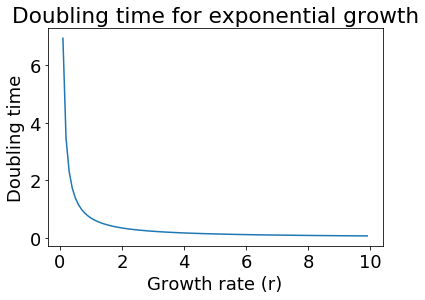

In [78]:
plt.plot(rs,np.log(2)/rs)
plt.ylabel('Doubling time'), plt.xlabel('Growth rate (r)'), plt.title('Doubling time for exponential growth')
plt.show()

#Logistic Growth
The Logistic, or Verhulst model is a resource constrained growth model, based on the observation that population rate is proportional to the population.

Mathematically, the Exponential model can be expressed as a differential equation

\begin{equation}
      \frac{dN}{dt} = rN\left(1-\frac{N}{K}\right) \tag{1}
\end{equation}

This equation has the slightly more complex solution

$$N(t) = \frac{N_0\, K\exp(r\,t)}{K+ N_0\,(\exp(r\,t)-1)}\, .$$

##Stationary states
The exponential model never stops growing. This is obviously not very realistic. We are interested in when the system stops growing, stops changing over time. This is when the rate of change is zero, i.e. $\Delta N=0$, more specifically for our models, we want to know when 
$$\frac{dN}{dt}=0$$.

For the logistic growth model, we have

$$ 0 = rN\left(1-\frac{N}{K}\right) $$

so that $N=0$ and $N=K$ are the stationary states.


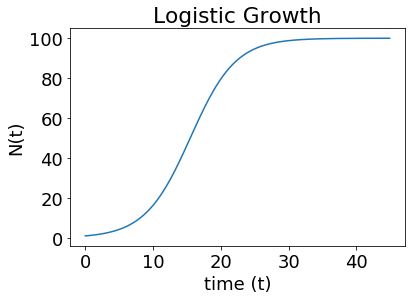

In [79]:
def ode_logistic(t, y):
    K = 1E2
    r = 0.3
    return r*y-r*y*y/K

t = np.arange(0, 45, 0.1)
# solve ODE
y_numeric = solve_euler(ode_logistic, t, y_0=1)
plt.plot(t, y_numeric)
plt.ylabel('N(t)'), plt.xlabel('time (t)'), plt.title('Logistic Growth')
plt.show()

# Logistic Growth with non-constant Growth Rate

So far we have assumed that the growth rate $r$ is constant in time, but more generally $r=r(t)$ may be a function of time. 

If an analytic expression is known for the functional form of the time dependency, the time-dependency can be included directly into the ODE-defining function and the time-dependent problem can be solved in the same way as the time-independent problem.

Consider the following example of a time dependent growth rate:

\begin{equation}
    r(t)=\frac{r_{in}+r_{fin}}{2} + \frac{r_{fin}-r_{in}}{2}\tanh(t-D),
\end{equation}

with parameters $r_{in}$, $r_{fin}$, and $D$.

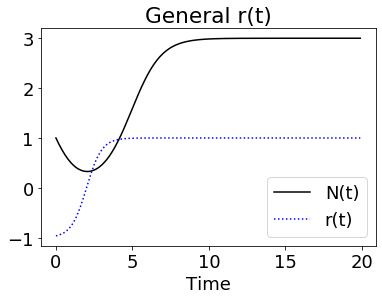

In [80]:
    rin  = -1 
    rfin = 1
    K = 3
    D = 2
def ode_log_growth_time_dep(t, y):
     r = 0.5*(rin+rfin)+0.5*(rfin-rin)*np.tanh(t-D)
     return r*y-r*y*y/K

def ode_r(t): 
     r = 0.5*(rin+rfin)+0.5*(rfin-rin)*np.tanh(t-D)
     return r

t = np.arange(0, 20, 0.1)
y_numeric = solve_euler(ode_log_growth_time_dep, t, y_0=1)

fig, ax = plt.subplots()
ax.plot(t, y_numeric, 'k-', label='N(t)')
ax.plot(t, ode_r(t), 'b:', label='r(t)')
plt.title('General r(t)'), plt.xlabel('Time')
legend = ax.legend(loc='lower right')
plt.show()

# Gompertzian Growth

The Gompertz model is an empirical growth model, based on the observation that population decline can be faster than a decaying exponential, which implies that the death rate must be increasing with age (because a constant death rate would result in exponential decrease).

Mathematically, the Gompertz model can be expressed as a system of two coupled differential equations

\begin{align}
      \frac{dN}{dt} &=G(t)N(t) \tag{1}\\
      \frac{dG}{dt} &=-r G(t) \tag{2}
\end{align}

where
 - the population $N(t)$ grows or shrinks over time with time-dependent growth factor $G(t)$
 - the growth factor $G(t)$ decays exponentially over time with constant rate $r$. 

We already know the solution to ODE (2): $G(t)=G_0\exp(-r\,t)$, with initial condition $G_0$.

This allows us to rewrite ODE (1) as:

$$\frac{dN}{dt}=G_0\exp(-r\,t)\, N(t) \tag{3}$$

Now we have reduced the system of coupled ODEs that define the Gompertz model to a single ODE that depends on time $t$ and population $N$. The per-capita growth rate decreases over time.

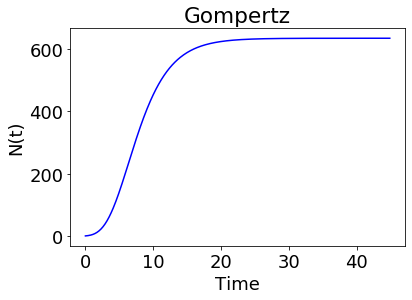

In [81]:
# Gompertz ODE with growth rate r and initial growth factor G0
def gompertz(t, N):
    r  = 0.3
    G0 = 2
    return G0*np.exp(-r*t)*N

t = np.arange(0, 45, 0.1)
y_numeric_single_ode = solve_euler(gompertz, t, y_0=1)

plt.plot(t, y_numeric_single_ode,'b')
plt.title('Gompertz'),plt.xlabel('Time'),plt.ylabel('N(t)')
plt.show()


#Compare models
Now lets compare Exponential, Logistic, and Gompertz together with the same initial population and growth rates.

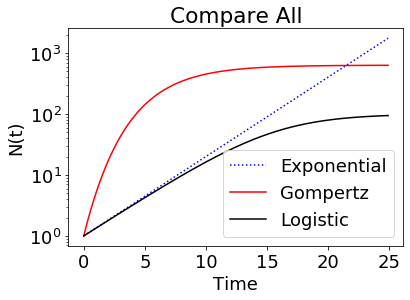

In [82]:
N0 = 1
r = 0.3

t = np.arange(0, 25, 0.1)

y_logrt = solve_euler(ode_log_growth_time_dep, t, N0)
y_log = solve_euler(ode_logistic, t, N0)
y_gomp = solve_euler(gompertz, t, N0)

fig, 
ax = plt.subplot()
ax.plot(t, expmodel(t,r,N0), 'b:', label='Exponential')
ax.plot(t, y_gomp, 'r-', label ='Gompertz')
ax.plot(t, y_log, 'k-', label='Logistic')
plt.title('Compare All'), plt.xlabel('Time'),plt.ylabel('N(t)'),plt.yscale("log")
legend = ax.legend(loc='best')
plt.show()

###Questions
- When do Exponential, Gompertz, and Logistic models intersect?
- If you could have 2 data points, at what points in time would you chose them?
- Is 2 data points enough to differentiate the models from each other?


#Dynamical Systems and phase spaces
Often, we are interested in the dynamics of more than one population. Instead of a single population, $N$, let's consider two species $x$ and $y$.

\begin{align}
      \frac{dx}{dt} &=F(x,y,t) \tag{1}\\
      \frac{dy}{dt} &=G(x,y,t) \tag{2}
\end{align}

The relationship between $x$ and $y$ is given by two differential equations and functions $F(x,y,t)$ and $G(x,y,t)$. Depending on how these equations relate, we can obtain many different behaviors over time. Studying how a system evolves over time in this way is commonly refered to as Dynamical Systems analysis. 

In general, we are interested in 
- identifying fixed points of the system 
- determining the stability or instability of the fixed points

##Phase space and trajectories
The phase space is the variable space of the system. In this case, it is the two-dimensional plane given by the ordered pair $(x,y)$. The system is initialized at some point $(x_0,y_0)$, and then the equations determine how the system evolves over time. This evolution creates a *trajectory*. 

###Example system
We will consider a number of dynamics that are possible from the following simple system:

\begin{align}
      \frac{dx}{dt} &=Ax +By \tag{1}\\
      \frac{dy}{dt} &=Cx+Dy \tag{2}
\end{align}


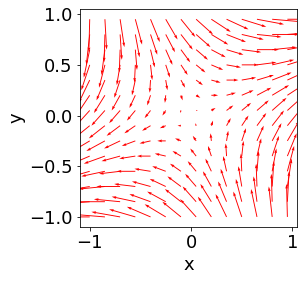

In [83]:
mygrid = np.arange(-1, 1, .15)
X, Y = np.meshgrid(mygrid, mygrid)
x_shape = X.shape
U = np.zeros(x_shape)
V = np.zeros(x_shape)

#system parameters
A = 1
B = 1
C = 1
D = -1
for i in range(x_shape[0]):
    for j in range(x_shape[1]):
        U[i,j] = A*X[i,j]+B*Y[i,j]
        V[i,j] = C*X[i,j]+D*Y[i,j]

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V, units='xy' ,scale=6, color='red')
ax.set_aspect('equal'),plt.xlabel('x'),plt.ylabel('y')
plt.show()